# Lab Activity (20pts)

* Using these tools, you will now setup your own simulation for a 4-sided die to start exploring the statistics involved in this example.

### Step 1: Create a for loop to simulate rolling a die *N* times, with an equal probability of landing on each face, keeping track of the outcome for each roll. (2pts)
* What is the mean value for the dice face after __N__ rolls?
* What would the ideal mean value be and how different is your experimental mean from this ideal mean?
  * Try this a few times, does your answer change?
  * What happens as you increase __N__?
  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
import time
from IPython import display

In [2]:
nfaces = []
N_rolls = 50
for i in range(N_rolls):
    roll = np.random.random()
    if roll < 0.25:
        nfaces.append(1)
    if roll > 0.25 and roll < 0.5:
        nfaces.append(2)
    if roll > 0.5 and roll < 0.75:
        nfaces.append(3)
    if roll > 0.75:
        nfaces.append(4)
print(nfaces)
print(np.mean(nfaces))

[3, 3, 4, 2, 4, 3, 2, 2, 4, 3, 4, 1, 1, 1, 1, 4, 2, 1, 2, 1, 3, 3, 3, 1, 3, 4, 1, 4, 1, 4, 3, 3, 1, 1, 1, 1, 4, 3, 2, 2, 3, 3, 2, 4, 4, 2, 4, 2, 1, 4]
2.5


### Step 2: Create a function that will run this *for* loop and which allows the user to set the number of times the die is rolled (2pts)
* Note: the function should have the value for __N__ as an input argument.

In [3]:
def get_nfaces(nrolls):
    nfaces = []
    for i in range(nrolls):
        roll = np.random.random()
        if roll < 0.25:
            nfaces.append(1)
        if roll > 0.25 and roll < 0.5:
            nfaces.append(2)
        if roll > 0.5 and roll < 0.75:
            nfaces.append(3)
        if roll > 0.75:
            nfaces.append(4)
    return nfaces

### Step 3: Write a for loop to run this die roll 'test' some number of times, keeping track of all of the outcomes for each test. (2pts)
* __Hint:__ you can have lists of lists - this will allow you to store all of the information generated

In [13]:
dice_exp = []
ntests = 10000
nrolls = 1000
for i in range(ntests):
    ifaces = get_nfaces(nrolls)
    dice_exp.append(ifaces)


### Step 4: Plot the distribution of the means from these tests (4pts)
* __Hint:__ Your work from step 3 should have given you a 2D array of data, with each row being the outcomes for a single test. Using numpy, you can calculate the mean for each test by specifying the axis along which to calculate the mean.
* Why are we looking at the mean of each roll, rather than the distribution of outcomes (or a specific outcome) as we did for the coin flip?
* As you increase the number of tests, what kind of probability distribution does this start to look like?

__4.i. Calculate the mean and standard diviation of this distribution of means and use those as the inputs for a normal distribution and plot that on top of your experimental distribution of the means (2pts)__ 
* __Hint:__ You can refer back to how I did this in the coin flip example - that notebook is on CoCalc
* How does the standard diviation of the means change as you change the number of tests? 
* How does it change as you change the number of dice rolls (__N__) performed in each test?

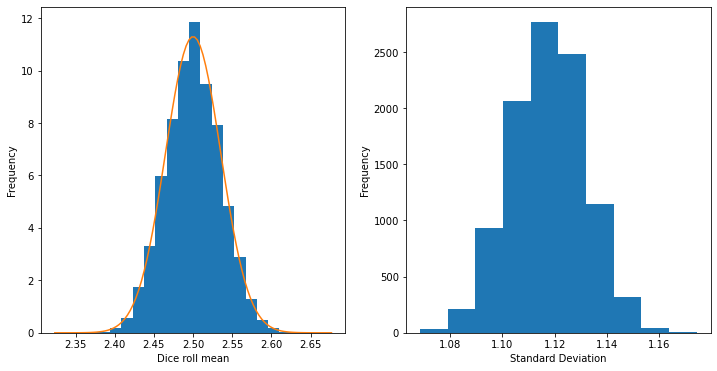

In [14]:
fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

dice_means = np.mean(np.array(dice_exp),axis=1)
ax1.hist(dice_means, bins=20, density=True)
mu = np.mean(dice_means)
sigma = np.std(dice_means)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax1.plot(x,y, label="P(x)")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Dice roll mean")

dice_stds = np.std(np.array(dice_exp),axis=1)
ax2.hist(dice_stds)
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Standard Deviation")
plt.show()


### Step 5: Create a new function that can change the weight you give to each side of the die and redo the previous steps up to plotting the distribution of the means. (3pts)
* Come up with a weighting that gives you the same distribution as the fair die?
* What else could we determine about the dice rolls besides the __mean__ that might help?
  * __Hint:__ there are two parameters we've discussed using to describe experimental data, the mean is one, what's the other?
  

In [19]:
def get_nfaces_unfair(nrolls):
    nfaces = []
    for i in range(nrolls):
        roll = np.random.random()
        if roll < 0.15:
            nfaces.append(1)
        if roll > 0.15 and roll < 0.5:
            nfaces.append(2)
        if roll > 0.5 and roll < 0.85:
            nfaces.append(3)
        if roll > 0.85:
            nfaces.append(4)
    return nfaces

### Step 6: Come up with a metric to determine if a die is fair (7pts)
* __Hint:__ You can demonstrate this using your simulation of a fair and unfair die and providing probability limits for fairness based on those simulations, assuming a normal (Gaussian) distributions with the 2σ(95%), 3σ(99.7%) probabilities for whatever properties you are comparing.
* How many rolls/tests will it take?
* How does this depend on the relative unfairness of the die?

Text(0.5, 0, 'Dice roll mean')

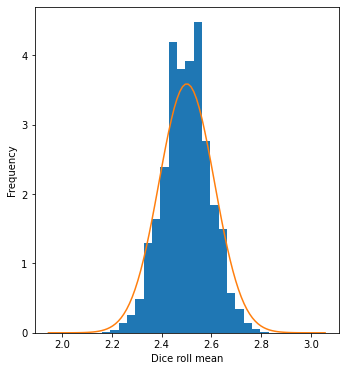

In [20]:
test_exp = []
ntests = 10000
nrolls = 100
for i in range(ntests):
    ifaces = get_nfaces_unfair(nrolls)
    test_exp.append(ifaces)

fair_exp = []
for i in range(ntests):
    ifaces = get_nfaces(nrolls)
    fair_exp.append(ifaces)

fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)

fair_means = np.mean(np.array(fair_exp),axis=1)
test_means = np.mean(np.array(test_exp),axis=1)
ax1.hist(test_means, bins=20, density=True)
mu = np.mean(fair_means)
sigma = np.std(fair_means)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax1.plot(x,y, label="P(x)")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Dice roll mean")




In [16]:
print(np.std(fair_means))
print(np.std(test_means))

0.11149220105460292
0.12859353317721697


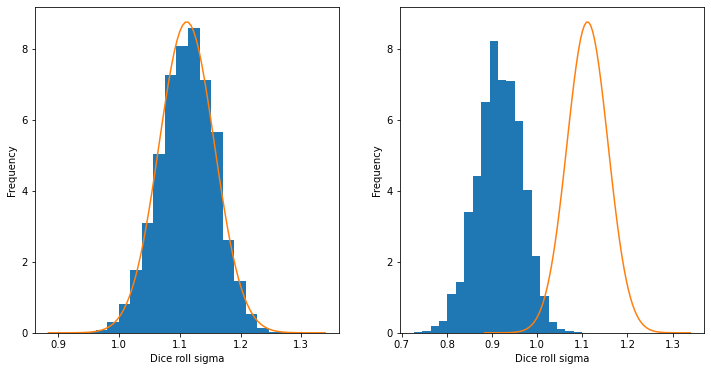

In [21]:
dice_stds = np.std(np.array(fair_exp),axis=1)
test_stds = np.std(np.array(test_exp),axis=1)

fig1 = plt.figure(1, figsize=(12,6))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

ax1.hist(dice_stds, bins=20, density=True)
mu = np.mean(dice_stds)
sigma = np.std(dice_stds)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax1.plot(x,y, label="P(x)")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Dice roll sigma")

ax2.hist(test_stds, bins=20, density=True)
mu = np.mean(dice_stds)
sigma = np.std(dice_stds)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y=norm.pdf(x, mu, sigma)
ax2.plot(x,y, label="P(x)")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Dice roll sigma")

plt.show()

In [18]:
print("The mean of the standard deviations with there uncertainties:")
print("Fair die:",np.mean(dice_stds),"+/-",np.std(dice_stds))
print("Weighted die:",np.mean(test_stds),"+/-",np.std(test_stds))

mean_diff_sigma = (np.mean(dice_stds) - np.mean(test_stds))/np.std(dice_stds)
print("Means are separated by:",mean_diff_sigma,"sigma")

The mean of the standard deviations with there uncertainties:
Fair die: 1.1111523389645077 +/- 0.04540087679444077
Weighted die: 1.2775803810718525 +/- 0.03662785688926888
Means are separated by: -3.665745110185261 sigma


The distribution of the sigmas for our dice roll is clearly shifted for the weighted die, even if the mean is still the same. With only 10 rolls, we get:

`Fair die: 1.0512935365983427 +/- 0.16112386510554377
Weighted die: 1.2087711351340598 +/- 0.15112029270325172`

But with 100 rolls this shrinks to:

`The mean of the standard deviations with there uncertainties:
Fair die: 1.1115417826978367 +/- 0.044973495715978064
Weighted die: 1.2774469419033785 +/- 0.03691883830385481`

This is a separation of more than 3 standard deviations - meaning there is now a less than 1% probability that this die is fair.

My scheme for deterimining the fairness of a die, then, is to check both the mean and sigma for the distribution of roll outcomes against that of a fair die, with enough rolls to make the uncertainty on the mean and sigma small. Based on my choice of number of rolls, there may be dice I fail to distinguish from fair.

If I now wanted to make this into a function, I could do so as follows. I will set my evaluation metric to be a sigma separation check on the mean and sigma, so that I can assign a probability of fairness, with my cutoff at 3 sigma, or < 1%.

In [22]:
def test_die(fair_exp, test_exp):
    fair_means = np.mean(np.array(fair_exp),axis=1)
    test_means = np.mean(np.array(test_exp),axis=1)
    
    fair_stds = np.std(np.array(fair_exp),axis=1)
    test_stds = np.std(np.array(test_exp),axis=1)

    fmean_mean = np.mean(fair_means)
    fmean_std = np.std(fair_means)
    
    fstd_mean = np.mean(fair_stds)
    fstd_std = np.std(fair_stds)
    
    tmean_mean = np.mean(test_means)
    tmean_std = np.std(test_means)
    
    tstd_mean = np.mean(test_stds)
    tstd_std = np.std(test_stds)
    
    mean_sigma_sep = (fmean_mean - tmean_mean)/fmean_std
    std_sigma_sep = (fstd_mean - tstd_mean)/fstd_std
    
    print("fair mean = {} +/- {}".format(fmean_mean,fmean_std))
    print("test mean = {} +/- {}".format(tmean_mean,tmean_std))
    print("fair std = {} +/- {}".format(fmean_std,fstd_std))
    print("test std = {} +/- {}".format(tmean_std,tstd_std))
    return mean_sigma_sep, std_sigma_sep

In [23]:
test_die(fair_exp, test_exp)

fair mean = 2.501046 +/- 0.11115325404143596
test mean = 2.4995540000000003 +/- 0.0928538695154919
fair std = 0.11115325404143596 +/- 0.04556069352008465
test std = 0.0928538695154919 +/- 0.04963819315898555


(0.013422908873577697, 4.2959607971542315)

### Step 7: Using the dice roll functions I provide, determine which of my die is fair and which is unfair and try to estimate how my unfair die is weighted. (Extra credit: ask me for the functions) *(+1pt per method if you're right)*
* Use the metric you developed in step 6
* Can you go further and extract the probability for each face independently to determine if they are equal?
* NOTE: There isn't necessarily one right answer here, I want you to explore the possibilities.

In [24]:
import sys
sys.path.append('../')
import dice_roll_methods

In [ ]:
dice_roll_methods.get_roll_1()

In [27]:
test_exp = []
ntests = 10000
nrolls = 1000
for i in range(ntests):
    ifaces = []
    for j in range(nrolls):
        ifaces.append(dice_roll_methods.get_roll_1())
    test_exp.append(ifaces)

fair_exp = []
for i in range(ntests):
    ifaces = get_nfaces(nrolls)
    fair_exp.append(ifaces)


In [28]:
test_die(fair_exp,test_exp)

fair mean = 2.4997425 +/- 0.035833746577074506
test mean = 2.4995632000000003 +/- 0.03746115862810438
fair std = 0.035833746577074506 +/- 0.014012920613379233
test std = 0.03746115862810438 +/- 0.01272077579314149


(0.005003663226059977, -6.138981554212677)

In [29]:
def test_die_blind(ntests,nrolls,get_roll):
    texp = []
    for i in range(ntests):
        ifaces = []
        for j in range(nrolls):
            ifaces.append(get_roll())
        texp.append(ifaces)

    fexp = []
    for i in range(ntests):
        ifaces = get_nfaces(nrolls)
        fexp.append(ifaces)

    return test_die(fexp,texp)

In [30]:
ntests = 10000
nrolls = 100
test_die_blind(ntests,nrolls,dice_roll_methods.get_roll_2)

fair mean = 2.500281 +/- 0.11202013675674566
test mean = 2.499429 +/- 0.11144058488270779
fair std = 0.11202013675674566 +/- 0.0451375491002107
test std = 0.11144058488270779 +/- 0.04566339760377902


(0.00760577539599164, 0.006261368622567754)

In [32]:
ntests = 1000
nrolls = 1000
test_die_blind(ntests,nrolls,dice_roll_methods.get_roll_3)

fair mean = 2.500736 +/- 0.035938952461083216
test mean = 2.4992799999999997 +/- 0.03182900563951062
fair std = 0.035938952461083216 +/- 0.014102580106361652
test std = 0.03182900563951062 +/- 0.015414112495156182


(0.04051314521692766, 6.554321786880724)

In [33]:
test_exp = []
ntests = 10000
nrolls = 100
for i in range(ntests):
    ifaces = []
    for j in range(nrolls):
        ifaces.append(dice_roll_methods.get_roll_1())
    test_exp.append(ifaces)

fair_exp = []
for i in range(ntests):
    ifaces = get_nfaces(nrolls)
    fair_exp.append(ifaces)

In [34]:
ones = []
twos = []
threes = []
fours = []
for i in range(len(test_exp)):
    ones.append(test_exp[i].count(1))
    twos.append(test_exp[i].count(2))
    threes.append(test_exp[i].count(3))
    fours.append(test_exp[i].count(4))

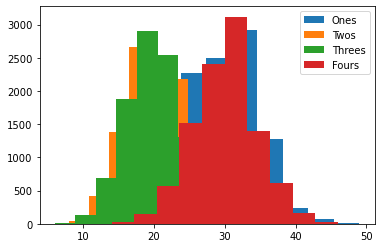

In [35]:
plt.hist(ones,label="Ones")
plt.hist(twos,label="Twos")
plt.hist(threes,label="Threes")
plt.hist(fours,label="Fours")
plt.legend()
plt.show()

In [36]:
mean_ones = np.mean(ones)
mean_twos = np.mean(twos)
mean_threes = np.mean(threes)
mean_fours = np.mean(fours)
print("1:",mean_ones,"2:",mean_twos,"3:",mean_threes,"4:",mean_fours)

1: 29.9801 2: 20.0844 3: 19.9641 4: 29.9714


My estimate would be that the weighting is 20% 2's and 3's and 30% 1's and 4's

In [ ]:
import sys
sys.path.append('.')
sys.path.append('/Users/ahanks/Downloads/')
#sys.path.append(r'C:/Users/ahanks/GitHub/E11work/')
sys.path.append('../packages/')
import LabMethods